# Homework Data Visualization

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# please import as much as you need

In [23]:
# read your data

df = pd.read_csv('telco_customer.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
#Replacing spaces with null values in total charge column
df['TotalCharges'] = df['TotalCharges'].replace(" ",np.nan)

## Data Overview

In [27]:
print("Rows         :",df.shape[0])
print("Columns      :",df.shape[1])
print("\nFeatures :\n ", df.columns.tolist())
print("\nUnique Values:     \n", df.nunique())

Rows         : 7043
Columns      : 21

Features :
  ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Unique Values:     
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64


In [28]:
# Cek Missing Value
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [30]:
#Droppping null values from total charges column which contains missing data
df.dropna(axis=0,inplace=True)

# Normal

## Dalam rata-rata, payment method mana yang memiliki monthly charge terbesar per customernya?

Hint: Gunakan groupby payment method terhadap monthly charge dengan aggregate function rata-rata

In [31]:
# Menghitung 'MonthlyCharges' per customer group by 'PaymentMethod' dengan aggregate Mean
df1 = df.groupby(['PaymentMethod']).mean()[['MonthlyCharges']].reset_index()
df1.head()

,PaymentMethod,MonthlyCharges
0,Bank transfer (automatic),67.205577
1,Credit card (automatic),66.519264
2,Electronic check,76.255814
3,Mailed check,43.958354


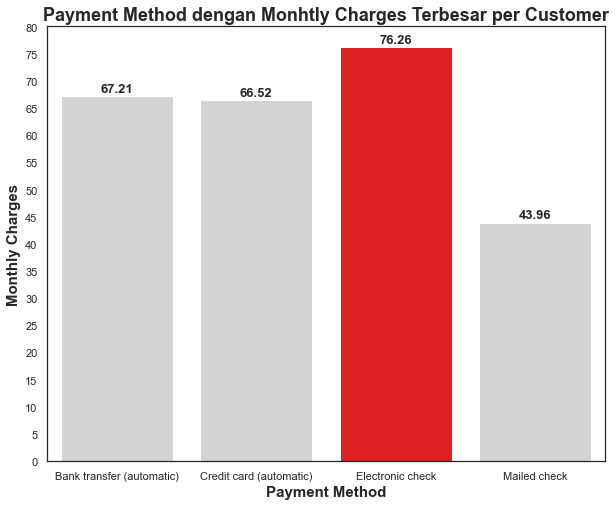

In [54]:
sns.set(style="white")

# highlight the MonthlyCharges terbesar
highlight1 = ['red' if (x == df1['MonthlyCharges'].max()) else 'lightgrey' for x in df1['MonthlyCharges']]

# membuat bar chart
plt.figure(figsize = (10, 8))
ax = sns.barplot(
    x = 'PaymentMethod',
    y = 'MonthlyCharges',
    data = df1,
    palette = highlight1
)

# mengatur titik pada y-axes
monthly_c = [i for i in range(0, 85, 5)]
plt.yticks(monthly_c)

# membuat judul dan merubah nama xlabel & ylabel
plt.title('Payment Method dengan Monhtly Charges Terbesar per Customer', fontsize = 18, fontweight = 'bold')
plt.xlabel('Payment Method', fontsize = 15, fontweight = 'bold')
plt.ylabel('Monthly Charges', fontsize = 15, fontweight = 'bold');

# memunculkan angka di tiap bar
for x in ax.patches:
    ax.annotate(
            format(x.get_height(), '.2f'),
            (x.get_x() + x.get_width() / 2., x.get_height()), 
            ha = 'center',
            va = 'center',
            fontweight = 'bold',
            size = 13,
            xytext = (0, 7), 
            textcoords = 'offset points'
    )

Jadi, dari plot di atas, dapat disimpulkan bahwa payment method dengan <b>Electronic Check</b> memiliki rata-rata monthly charge terbesar 

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

## Bagaimana jumlah customer dilihat dari tenure group?

Tenure group:
- low_tenure: User dengan tenure < 21 hari
- medium_tenure: User dengan tenure 21 - 40 hari
- high_tenure: User dengan tenure > 40 hari

Hint:
- Memotong data integer menjadi group categorical dapat menggunakan beberapa macam cara, contohnya dengan numpy.where atau pandas.cut
- Mirip dengan plot pertama, namun ini menghitung jumlah unique users

In [41]:
# Membuat kolom Tenure group
df['TenureGroup'] = np.where(df['tenure'] < 21, 'low_tenure', np.where((df['tenure'] >= 21) & (df['tenure'] <= 40), 'medium_tenure', 'high_tenure'))
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,low_tenure
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,medium_tenure
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,low_tenure
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,high_tenure
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,low_tenure


In [42]:
# Menghitung jumlah unique customers, group by TenureGroup
df2 = df.groupby(['TenureGroup']).nunique()[['customerID']].reset_index()
df2.head()

,TenureGroup,customerID
0,high_tenure,2757
1,low_tenure,2867
2,medium_tenure,1408


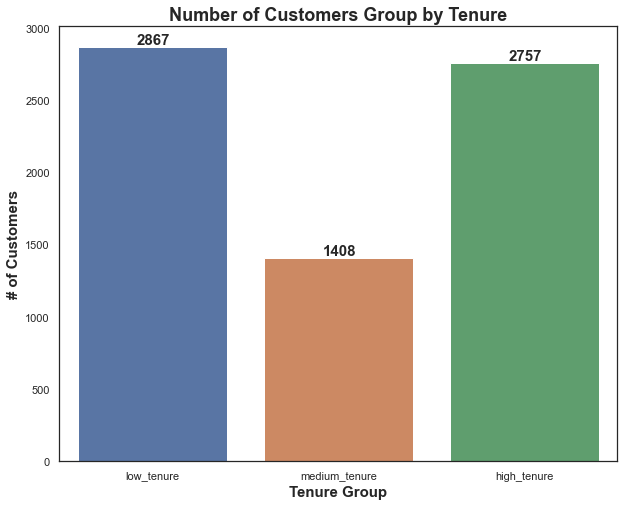

In [58]:
# membuat bar chart
plt.figure(figsize = (10, 8))
ax = sns.barplot(
    x = 'TenureGroup',
    y = 'customerID',
    data = df2,
    order = ['low_tenure','medium_tenure','high_tenure']
)

# Menambahkan tittle
plt.title('Number of Customers Group by Tenure', fontsize = 18, fontweight = 'bold')

# memberikan nama xlabel & ylabel
plt.xlabel('Tenure Group', fontsize = 15, fontweight = 'bold')
plt.ylabel('# of Customers', fontsize = 15, fontweight = 'bold');

# memunculkan angka di tiap bar
for x in ax.patches:
    ax.annotate(
            format(x.get_height(), '.0f'),
            (x.get_x() + x.get_width() / 2., x.get_height()), 
            ha = 'center',
            va = 'center',
            fontweight = 'bold',
            size = 15,
            xytext = (1, 7), 
            textcoords = 'offset points'
    )

Jadi, dari plot di atas, kami menyimpulkan bahwa jumlah customer paling banyak pada kelomok <b> LOW_TENURE </b>. kemudian diikuti oleh kelompok <b> HIGH_TENURE </b> dengan selisih 119 customer. Sedangkan jumlah customer paling sedikit pada kelomok <b> MEDIUM_TENURE </b>

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

## Apakah kebanyakan dari Senior Citizen berlangganan PhoneService?

Hint:
- Dapat menggunakan feature/input parameter hue pada seaborn
- Dalam menghitung jumlah unique customer, jangan lupa perhatikan angka rasio, tidak hanya angka absolutnya



In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [75]:
df3 = df.groupby(['PhoneService','SeniorCitizen']).nunique()[['customerID']].reset_index()
df3['TotalCustomer'] = df3.groupby(['PhoneService'])['customerID'].transform('sum')
df3['PercentagePhoneService(%)'] = round((df3['customerID'] / df3['TotalCustomer'] * 100),2)
df3.head()

,PhoneService,SeniorCitizen,customerID,TotalCustomer,PercentagePhoneService(%)
0,No,0,576,680,84.71
1,No,1,104,680,15.29
2,Yes,0,5314,6352,83.66
3,Yes,1,1038,6352,16.34


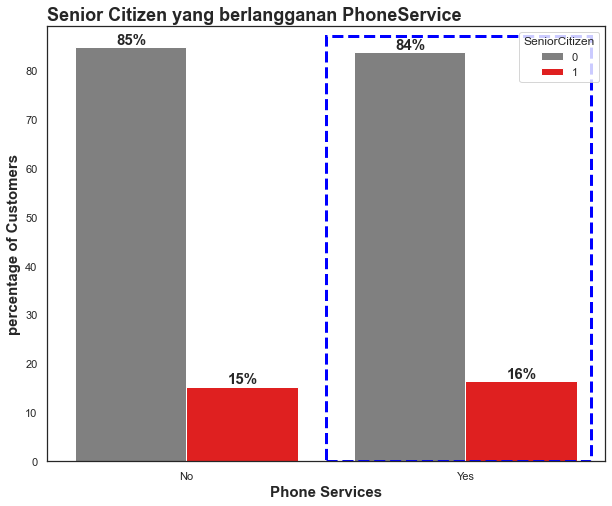

In [194]:
from matplotlib.patches import Rectangle
# create bar plot number of unique customers 
plt.figure(figsize = (10, 8))
ax = sns.barplot(
    x = 'PhoneService',
    y = 'PercentagePhoneService(%)',
    hue = 'SeniorCitizen',
    data = df3,
    palette = color_focus3
)

# highlight important part
ax.add_patch(Rectangle(
    (0.5, 0),
    0.95, 87,
    fc ='none',
    ec ='blue',
    lw = 3,
    linestyle = '--')
)


# menambahkan title
plt.title('Senior Citizen yang berlangganan PhoneService', fontsize = 18, fontweight = 'bold',loc = 'left')

# add xlabel & ylabel
plt.xlabel('Phone Services', fontsize = 15, fontweight = 'bold')
plt.ylabel('percentage of Customers', fontsize = 15, fontweight = 'bold')

# memunculkan angka di tiap bar
for x in ax.patches:
    if x.get_height() == 87: # continue if it's the 'Rectangle'
        continue
    else:
        ax.annotate(
            format(x.get_height(), '.0f')+'%',
            (x.get_x() + x.get_width() / 2., x.get_height()), 
            ha = 'center',
            va = 'center',
            fontweight = 'bold',
            size = 15,
            xytext = (1, 7), 
            textcoords = 'offset points'
    )

Jadi, dari plot di atas, dapat disimpulkan bahwa yang berlangganan Phone Service dari Customer <b>Senior Citizen</b> lebih sedikit dari yang <b> Bukan Senior Citizen</b> yaitu sebesar 16% dan yang <b> Bukan Senior Citizen</b> sebesar 84%, sedangkan secara absolut sebesar 1038 customer, yang <b> Bukan Senior Citizen</b> yaitu sebesar 5314.

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

## Bagaimana Distribusi dari TotalCharge?

Hint:
- Ubah datatype TotalCharge dari object ke int atau float
- Buat distribusi plot!

In [132]:
#Converting type of TotalCharges to float
df["TotalCharges"] = df["TotalCharges"].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


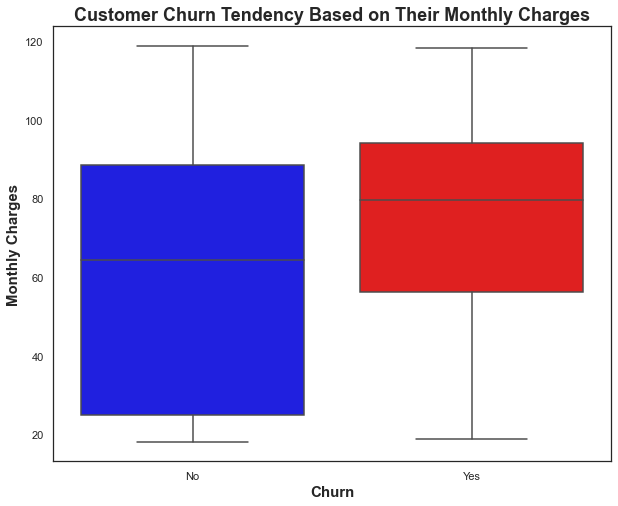

In [182]:
# membuat box plot
plt.figure(figsize = (10, 8))
sns.boxplot(
    x = 'Churn',
    y = 'MonthlyCharges',
    data = df,
    palette = ['blue', 'red']
)

# Menambahkan title
plt.title('Customer Churn Tendency Based on Their Monthly Charges', fontsize = 18, fontweight = 'bold')


# memberi nama xlabel & ylabel
plt.xlabel('Churn', fontsize = 15, fontweight = 'bold')
plt.ylabel('Monthly Charges', fontsize = 15, fontweight = 'bold');

(array([2709., 1228.,  671.,  508.,  454.,  412.,  395.,  310.,  223.,
         122.]),
 array([  18.8,  885.4, 1752. , 2618.6, 3485.2, 4351.8, 5218.4, 6085. ,
        6951.6, 7818.2, 8684.8]),
 <a list of 10 Patch objects>)

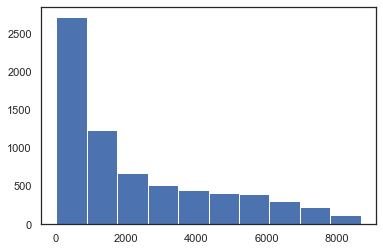

In [151]:
plt.hist(df4)

Jadi, dari plot di atas, dapat disimpulkan bahwa jumlah pelanggan terbesar membayar nilai antara 0 dan 2000, setelah itu jumlah pelanggan menurun secara signifikan

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

# Intermediate

## Apakah customer yang memiliki monthly charges yang tinggi cenderung churn?

Hint: dapat ditunjukan melalui distribusi data

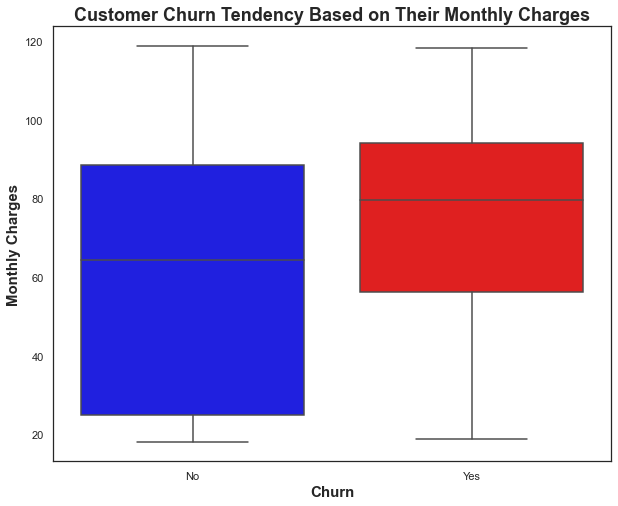

In [183]:
# membuat box plot
plt.figure(figsize = (10, 8))
sns.boxplot(
    x = 'Churn',
    y = 'MonthlyCharges',
    data = df,
    palette = ['blue', 'red']
)

# menambahkan title
plt.title('Customer Churn Tendency Based on Their Monthly Charges', fontsize = 18, fontweight = 'bold')


# memberi nama xlabel & ylabel
plt.xlabel('Churn', fontsize = 15, fontweight = 'bold')
plt.ylabel('Monthly Charges', fontsize = 15, fontweight = 'bold');

Jadi, dari plot di atas, dapat disimpulkan bahwa Pelanggan dengan biaya bulanan yang tinggi cenderung melakukan churn

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

## Bagaimana pengaruh memiliki partner & dependents terhadap tingkat churn customer?

Hint: concat partner dan dependents, gunakan parameter 'hue' pada seaborn untuk mempermudah

In [154]:
# concat variable 'Partner' & 'Dependents' columns
df['Partner & Dependents'] = df['Partner'] + ' - ' + df['Dependents']
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,Partner & Dependents
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,low_tenure,Yes - No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,medium_tenure,No - No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,low_tenure,No - No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,high_tenure,No - No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,low_tenure,No - No


In [184]:
# menghitung jumlah unique customers, group by Partner & Dependents and Churn
df4_in_numbers = df.groupby(['Partner & Dependents', 'Churn']).nunique()[['customerID']].reset_index()
df4_in_numbers

,Partner & Dependents,Churn,customerID
0,No - No,No,2157
1,No - No,Yes,1123
2,No - Yes,No,282
3,No - Yes,Yes,77
4,Yes - No,No,1233
5,Yes - No,Yes,420
6,Yes - Yes,No,1491
7,Yes - Yes,Yes,249


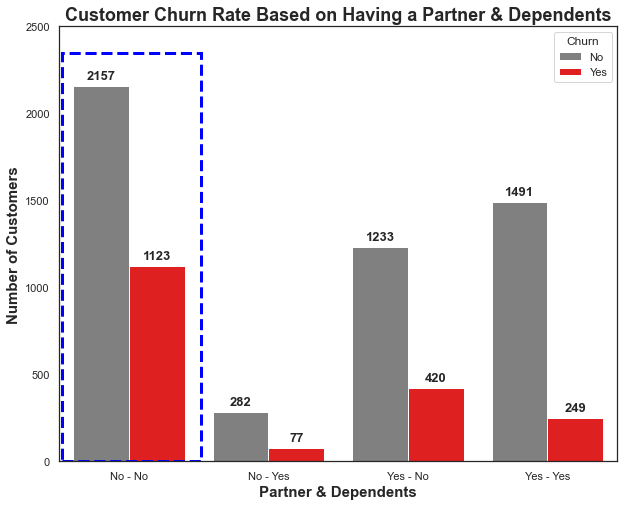

In [193]:
# highlight Churn = 'Yes'
color_focus2 = ['red' if (x == 'Yes') else 'grey' for x in df4_in_numbers['Churn']]

# membuat bar plot jumlah unique customers group by Partner & Dependents and Churn
plt.figure(figsize = (10, 8))
ax = sns.barplot(
    x = 'Partner & Dependents',
    y = 'customerID',
    hue = 'Churn',
    data = df4_in_numbers,
    palette = color_focus2
)

# highlight important part
ax.add_patch(Rectangle(
    (-0.48, 0),
    1, 2350,
    fc ='none',
    ec ='blue',
    lw = 3,
    linestyle = '--')
)

# mengatur yticks 
num_of_customers = [x for x in range(0, 3000, 500)]
plt.yticks(num_of_customers)

# menambahkan title
plt.title('Customer Churn Rate Based on Having a Partner & Dependents', fontsize = 18, fontweight = 'bold')

# menambahkan xlabel & ylabel
plt.xlabel('Partner & Dependents', fontsize = 15, fontweight = 'bold')
plt.ylabel("Number of Customers", fontsize = 15, fontweight = 'bold');

# memberi angka di tiap bar
for i in ax.patches:
    if i.get_height() == 2350: # continue if it's the 'Rectangle'
        continue
    else:
        ax.annotate(
            format(i.get_height(), '.0f'),
            (i.get_x() + i.get_width() / 2., i.get_height()), 
            ha = 'center',
            va = 'center',
            fontweight = 'bold',
            size = 13,
            xytext = (0, 10), 
            textcoords = 'offset points'
        )

Jadi, dari plot di atas, dapat disimpulkan bahwa Pelanggan yang tidak memiliki pasangan & tanggungan cenderung churn

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

# Soal Hard

## Buatlah satu insight dari data telco customer, dan sertakan storyline pada visualisasi tersebut!

In [166]:
df6 = df[['customerID','PaymentMethod','Churn']]
df6.head()

,customerID,PaymentMethod,Churn
0,7590-VHVEG,Electronic check,No
1,5575-GNVDE,Mailed check,No
2,3668-QPYBK,Mailed check,Yes
3,7795-CFOCW,Bank transfer (automatic),No
4,9237-HQITU,Electronic check,Yes


In [186]:
# menghitung percentage of number of unique customers group by PaymentMethod and Churn
df6_percentage_of_customers = df.groupby(['PaymentMethod', 'Churn']).nunique()[['customerID']]
Payment_Method = df6.groupby(['PaymentMethod']).nunique()[['customerID']]
df6_percentage_of_customers = round((df6_percentage_of_customers.div(Payment_Method, level = 'PaymentMethod') * 100),2)
df6_percentage_of_customers = df6_percentage_of_customers.reset_index()
df6_percentage_of_customers

,PaymentMethod,Churn,customerID
0,Bank transfer (automatic),No,83.27
1,Bank transfer (automatic),Yes,16.73
2,Credit card (automatic),No,84.75
3,Credit card (automatic),Yes,15.25
4,Electronic check,No,54.71
5,Electronic check,Yes,45.29
6,Mailed check,No,80.80
7,Mailed check,Yes,19.20


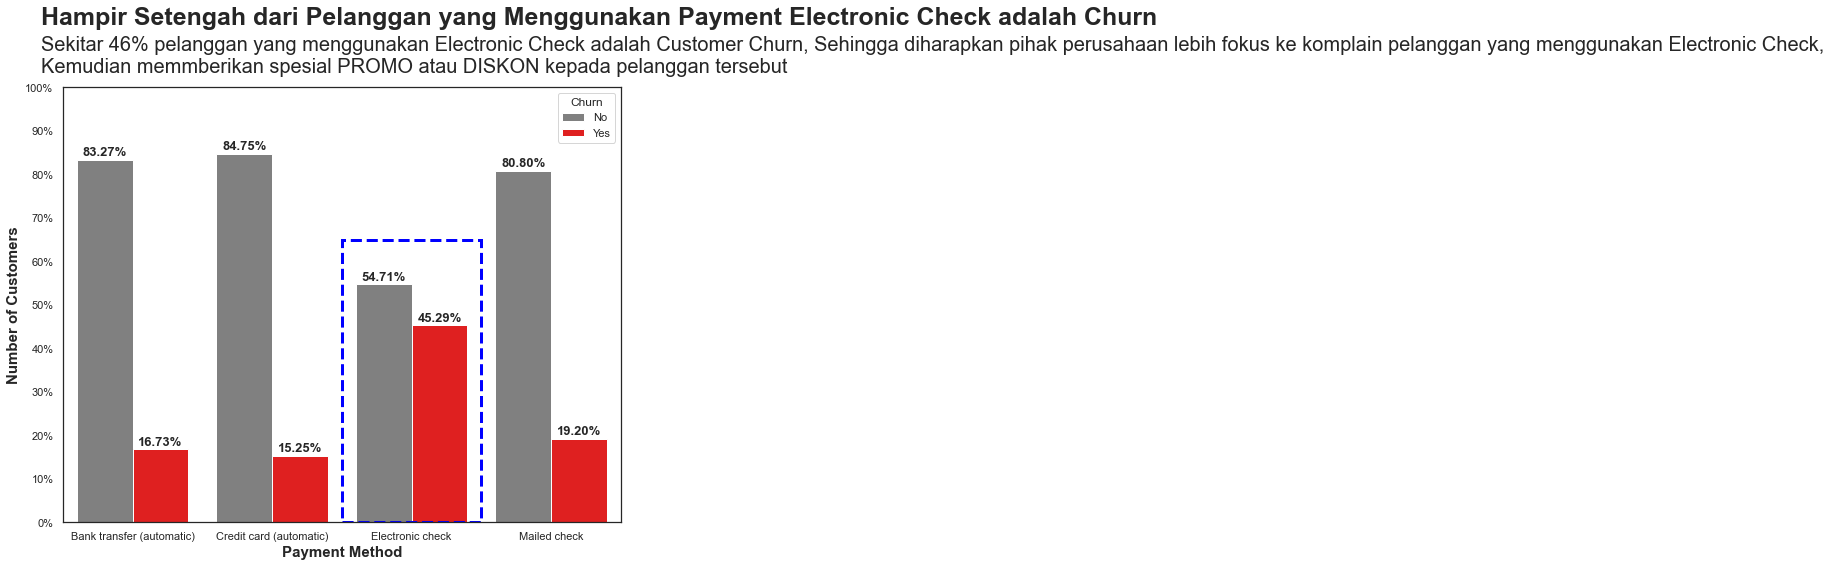

In [197]:
# highlight Churn = 'Yes'
color_focus3 = ['red' if (x == 'Yes') else 'grey' for x in df6_percentage_of_customers['Churn']]

# membuat bar plot jumlah unique customers group by PaymentMethod and Churn
plt.figure(figsize = (10, 8))
ax = sns.barplot(
    x = 'PaymentMethod',
    y = 'customerID',
    hue = 'Churn',
    data = df6_percentage_of_customers,
    palette = color_focus3
)
# highlight important part
ax.add_patch(Rectangle(
    (1.5, 0),
    1, 65,
    fc ='none',
    ec ='blue',
    lw = 3,
    linestyle = '--')
)
# mengatur yticks 
percentage_ = [x for x in range(0, 110, 10)]
plt.yticks(percentage_)

# menambahkan tile and subtitle
plt.title('Hampir Setengah dari Pelanggan yang Menggunakan Payment Electronic Check adalah Churn', fontsize = 25, fontweight = 'bold', x = -0.04, y = 1.13, loc = 'left')
plt.suptitle('Sekitar 46% pelanggan yang menggunakan Electronic Check adalah Customer Churn, Sehingga diharapkan pihak perusahaan lebih fokus ke komplain pelanggan yang menggunakan Electronic Check,\nKemudian memmberikan spesial PROMO atau DISKON kepada pelanggan tersebut', fontsize = 20, x = 0.095, y = 0.97, ha = 'left')

# add xlabel & ylabel
plt.xlabel('Payment Method', fontsize = 15, fontweight = 'bold')
plt.ylabel('Number of Customers', fontsize = 15, fontweight = 'bold')

# formatting ylabels + '%'
ylabels = [format(y) + '%' for y in ax.get_yticks()]
ax.set_yticklabels(labels = ylabels);

# add data points
for i in ax.patches:
    if i.get_height() == 65: 
        continue
    else:
        ax.annotate(
            format(i.get_height(), '.2f') + '%',
            (i.get_x() + i.get_width() / 2., i.get_height()), 
            ha = 'center',
            va = 'center',
            fontweight = 'bold',
            size = 13,
            xytext = (0, 7), 
            textcoords = 'offset points'
        )